In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from naics_convert import naics2industries, naics2sectors

In [2]:
business = pd.read_csv("data/Business_Listing.csv", low_memory=False)

In [3]:
business.head()

,X,Y,ObjectId,BusinessFactId,BusinessId,LegalEntityName,Dba,Ubi,Naic,LegalEntityType,...,MailingZip4,PhysicalAddressLine1,PhysicalAddressLine2,Textbox4,PhysicalCity,PhysicalState,PhysicalPostalCode,PhysicalZip4,ProductsAndServices,IssueDate
0,-122.118803,47.594151,1,1,171474,ABACUS SCIENTIFIC INC,ABACUS SCIENTIFIC,6.047495e+15,541519.0,Corporation,...,5150,16517 SE 18th St,NaN,16517 SE 18th St,Bellevue,WA,98008,5150.0,Research and development. Computer Software,2021/07/26 06:59:59+00
1,-122.132494,47.605783,2,2,171612,"BELLEVUE SUNFLOWER DAYCARE,LLC",BELLEVUE SUNFLOWER DAYCARE,6.047834e+15,611710.0,LLC or PLLC,...,5345,445 156th Ave SE,NaN,445 156th Ave SE,Bellevue,WA,98007,5345.0,Family childcare services for kids under 12-ye...,2021/08/09 06:59:59+00
2,-122.132017,47.622329,3,3,31781,BURGERMASTER OF BELLEVUE,NaN,1.790218e+08,722513.0,NaN,...,5098,1350 156TH AV NE,NaN,1350 156TH AV NE,BELLEVUE,WA,98007,4412.0,RESTAURANT,1988/11/01 07:59:59+00
3,-122.190504,47.626318,4,4,38947,CARL H JELSTRUP DC PS INC,NaN,6.013319e+08,621310.0,Corporation,...,NaN,1750 112TH AV NE,D154,1750 112TH AV NE D154,BELLEVUE,WA,98005,3727.0,CHIROPRACTIC HEALTH CARE,1992/04/01 08:00:00+00
4,-122.117462,47.641262,5,5,167692,ICK International Inc,ICK International Inc,6.044245e+15,541613.0,Corporation,...,6173,3508 167th Pl NE,NaN,3508 167th Pl NE,Bellevue,WA,98008,6173.0,SOFTWARE DEVELOPMENT and MARKETING,2020/04/08 06:59:59+00


In [4]:
business.shape

(41407, 28)

In [5]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41407 entries, 0 to 41406
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     41407 non-null  float64
 1   Y                     41407 non-null  float64
 2   ObjectId              41407 non-null  int64  
 3   BusinessFactId        41407 non-null  int64  
 4   BusinessId            41407 non-null  int64  
 5   LegalEntityName       41407 non-null  object 
 6   Dba                   9212 non-null   object 
 7   Ubi                   41407 non-null  float64
 8   Naic                  40592 non-null  float64
 9   LegalEntityType       39851 non-null  object 
 10  FirstActivityDate     41407 non-null  object 
 11  CancelDate            24972 non-null  object 
 12  MailingAddressId      41404 non-null  float64
 13  MailingAddressLine1   41404 non-null  object 
 14  MailingAddressLine2   16509 non-null  object 
 15  MailingCity        

In [6]:
business.isna().sum()

X                           0
Y                           0
ObjectId                    0
BusinessFactId              0
BusinessId                  0
LegalEntityName             0
Dba                     32195
Ubi                         0
Naic                      815
LegalEntityType          1556
FirstActivityDate           0
CancelDate              16435
MailingAddressId            3
MailingAddressLine1         3
MailingAddressLine2     24898
MailingCity                 3
MailingState                5
MailingPostalCode           3
MailingZip4             15294
PhysicalAddressLine1        0
PhysicalAddressLine2    21578
Textbox4                    0
PhysicalCity                0
PhysicalState               0
PhysicalPostalCode          0
PhysicalZip4            15624
ProductsAndServices       729
IssueDate                 217
dtype: int64

In [173]:
for date_col in ['CancelDate','FirstActivityDate','IssueDate']:
    business[date_col] = pd.to_datetime(business[date_col])


In [8]:
business['FirstActivityDate'].max(),business['FirstActivityDate'].min()

(Timestamp('2023-01-01 08:00:00+0000', tz='UTC'),
 Timestamp('1904-09-01 07:00:00+0000', tz='UTC'))

In [9]:
business['IssueDate'].max(),business['IssueDate'].min()

(Timestamp('2022-05-26 06:59:59+0000', tz='UTC'),
 Timestamp('1953-01-01 08:00:00+0000', tz='UTC'))

In [10]:
business = business.dropna(subset=['IssueDate'])
business.shape

(41190, 28)

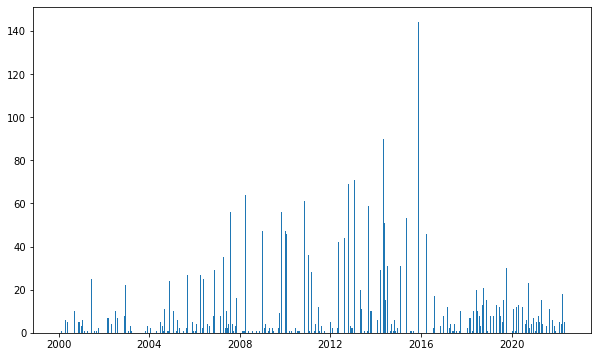

In [11]:
plt.figure(figsize=(10,6))
plt.hist(x=business['IssueDate'],bins=pd.date_range("2000-01-01", "2022-05-26", freq="D"))
plt.show()

In [13]:
business["Sector"] = naics2sectors(business["Naic"])
business["Industry"] = naics2industries(business["Naic"])

In [15]:
business['Year'] = business['IssueDate'].dt.year

In [71]:
all_sectors = business['Sector'].value_counts()
labels = all_sectors.index.to_list()
colors = dict(zip(labels,plt.cm.tab20.colors[:len(labels)]))

In [72]:
colors['Other'] = plt.cm.tab20_r.colors[2]

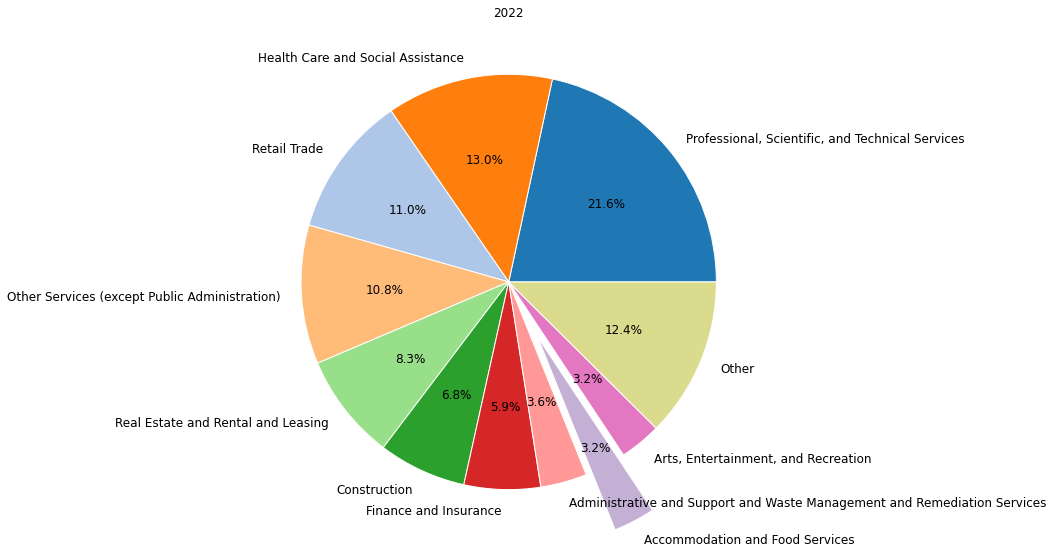

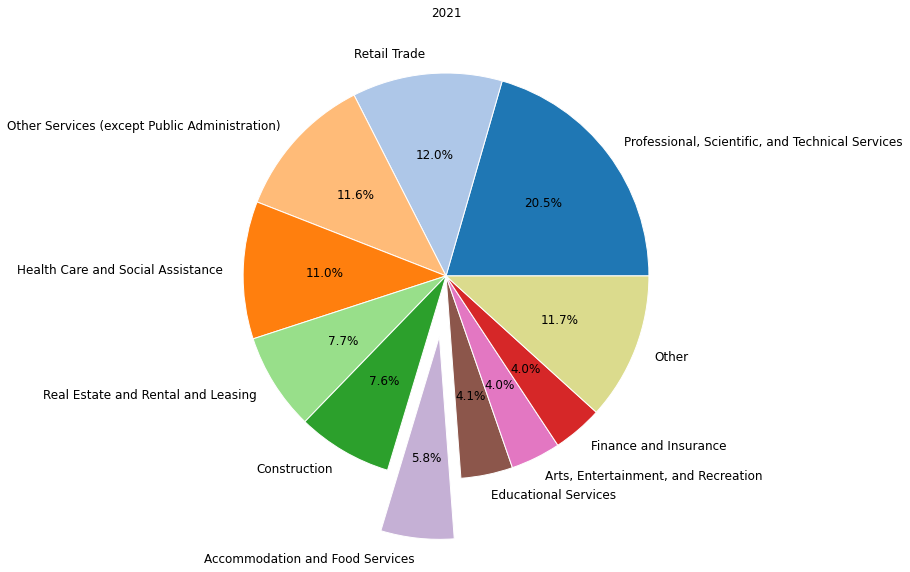

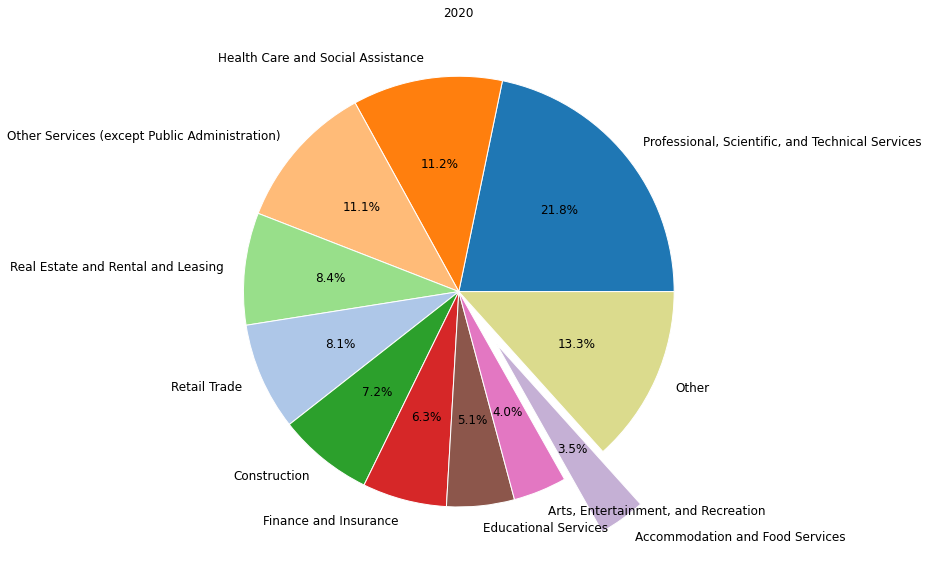

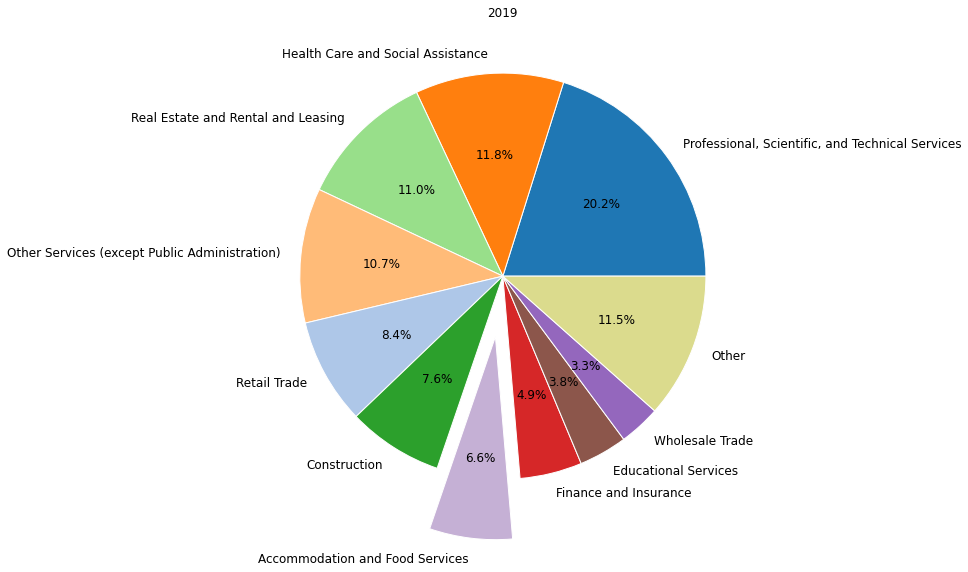

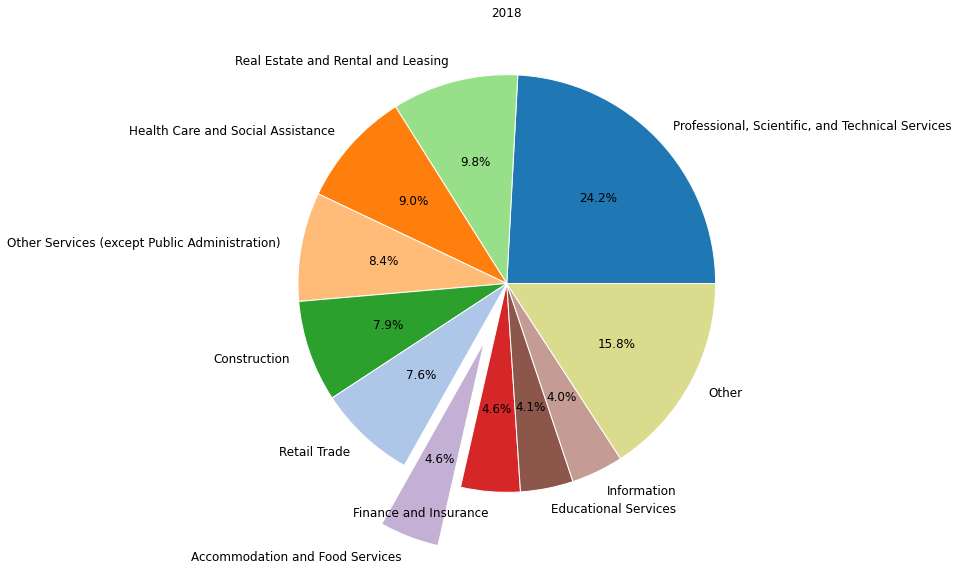

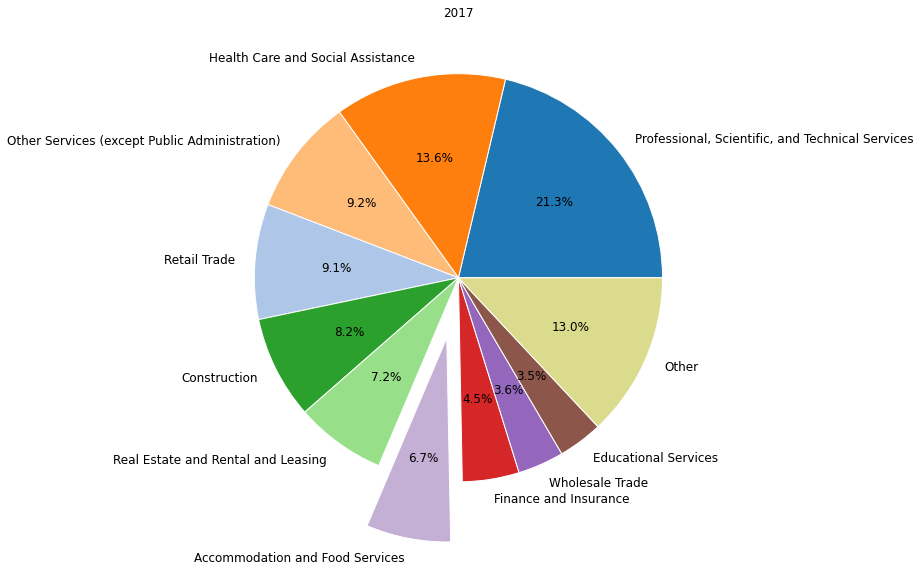

In [123]:
for year in sorted(business['Year'].unique(),reverse=True)[:6]:
    plt.figure(figsize=(12,8))
    sector_count = business[business['Year']==year]['Sector'].value_counts()
    sector_count[10] = sum(sector_count[10:])
    sector_count = sector_count[:11]
    sector_index = sector_count.index.to_list()
    sector_index[10] = 'Other'
    sector_count.index = sector_index
    explode = np.zeros(11)
    explode[sector_index.index("Accommodation and Food Services")] = 0.3
    ax = sector_count.plot.pie(autopct='%1.1f%%',explode=explode,wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},colors=[colors[key] for key in sector_count.index],textprops={'fontsize':12})
    plt.title(year)
    plt.ylabel("")
    plt.tight_layout()
plt.show()

In [206]:
industry_dict = {}
post_covid = set()
pre_covid = set()
for year in sorted(business['Year'].unique(),reverse=True)[:7]:
    plt.figure(figsize=(12,8))
    industry_count = business[business['Year']==year]['Industry'].value_counts()
    industry_count = industry_count[:10]
    industry_dict[year] = industry_count.index
    if year < 2020:
        pre_covid.update(industry_count.index)
    else:
        post_covid.update(industry_count.index)
pd.DataFrame(industry_dict)

,2022,2021,2020,2019,2018,2017,2016
0,Custom Computer Programming Services,"All Other Professional, Scientific, and Techni...",Offices of Mental Health Practitioners (except...,Beauty Salons,Administrative Management and General Manageme...,Custom Computer Programming Services,Custom Computer Programming Services
1,Offices of Mental Health Practitioners (except...,Offices of Mental Health Practitioners (except...,"All Other Professional, Scientific, and Techni...",Full-Service Restaurants,Beauty Salons,Offices of All Other Miscellaneous Health Prac...,Beauty Salons
2,Beauty Salons,All Other Personal Services,Administrative Management and General Manageme...,Custom Computer Programming Services,Custom Computer Programming Services,Offices of Mental Health Practitioners (except...,Administrative Management and General Manageme...
3,"All Other Professional, Scientific, and Techni...",Custom Computer Programming Services,Custom Computer Programming Services,Offices of Real Estate Agents and Brokers,Offices of Real Estate Agents and Brokers,Administrative Management and General Manageme...,Offices of All Other Miscellaneous Health Prac...
4,Residential Remodelers,Beauty Salons,Other Activities Related to Real Estate,Offices of Mental Health Practitioners (except...,Other Activities Related to Real Estate,New Single-Family Housing Construction (except...,All Other Personal Services
5,Lessors of Residential Buildings and Dwellings,Lessors of Residential Buildings and Dwellings,All Other Personal Services,Other Activities Related to Real Estate,Residential Remodelers,Offices of Lawyers,New Single-Family Housing Construction (except...
6,All Other Personal Services,Electronic Shopping and Mail-Order Houses,Residential Remodelers,Residential Remodelers,"All Other Professional, Scientific, and Techni...",Beauty Salons,Computer Systems Design Services
7,Offices of All Other Miscellaneous Health Prac...,Offices of Lawyers,Beauty Salons,Lessors of Residential Buildings and Dwellings,Marketing Consulting Services,Limited-Service Restaurants,Offices of Real Estate Agents and Brokers
8,"Independent Artists, Writers, and Performers","Independent Artists, Writers, and Performers",Lessors of Residential Buildings and Dwellings,"All Other Professional, Scientific, and Techni...",Offices of Mental Health Practitioners (except...,Full-Service Restaurants,Residential Remodelers
9,Administrative Management and General Manageme...,Residential Remodelers,"Independent Artists, Writers, and Performers",All Other Personal Services,Electronic Shopping and Mail-Order Houses,Offices of Physicians (except Mental Health Sp...,Offices of Mental Health Practitioners (except...


<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [207]:
post_covid.difference(pre_covid)

{'Independent Artists, Writers, and Performers '}

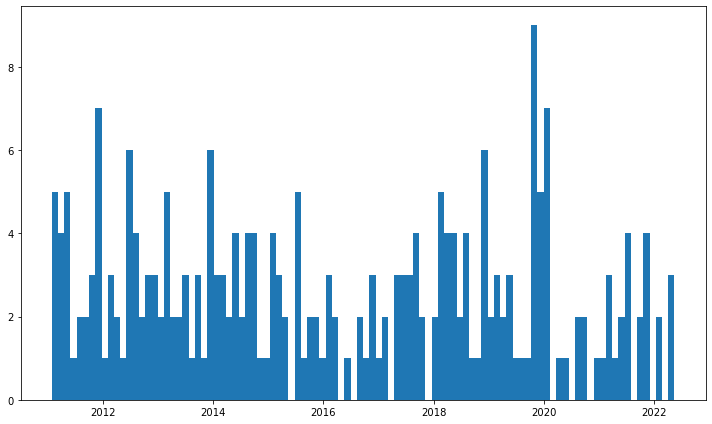

In [223]:
plt.figure(figsize=(10,6))
restaurants = business.query('Year > 2010 and Industry == "Full-Service Restaurants "')
plt.hist(x=restaurants['IssueDate'],bins=100)
plt.tight_layout()
plt.show()

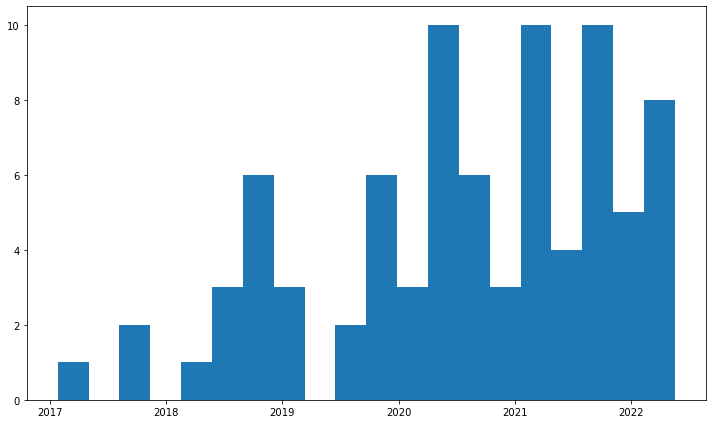

In [217]:

plt.figure(figsize=(10,6))
restaurants = business.query('Year > 2016 and Industry == "Independent Artists, Writers, and Performers "')
plt.hist(x=restaurants['IssueDate'],bins=20)
plt.tight_layout()
plt.show()

In [222]:
business.query('Year > 2020 and Industry == "Independent Artists, Writers, and Performers "')[['LegalEntityName','Dba','ProductsAndServices','Year','Industry']].head()

,LegalEntityName,Dba,ProductsAndServices,Year,Industry
2534,Anthony Media LLC,Anthony Media LLC,Videographer and Video Editor,2021,"Independent Artists, Writers, and Performers"
3908,"Roitblat, Barry",Barry Roitblat,Producing and selling turned wood crafts,2021,"Independent Artists, Writers, and Performers"
4051,"Bellard, David Andrew",Bellard Fine Art,I am an artist making limited edition art for ...,2022,"Independent Artists, Writers, and Performers"
4835,"Grassel, Benjamin Jon",BenjaminJay Creative,"Creative writing, marketing, and design work.",2021,"Independent Artists, Writers, and Performers"
5904,"Magnuson, Kristen",Brickistry,"I am an independent artist, creating artwork a...",2021,"Independent Artists, Writers, and Performers"


<AxesSubplot:xlabel='X', ylabel='Y'>

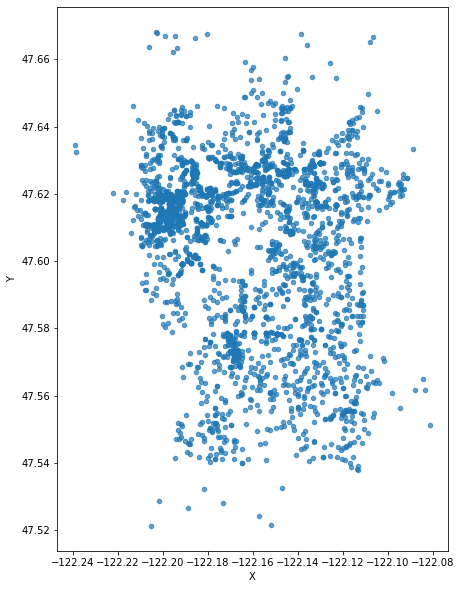

In [199]:
business.query('Year >= 2020').plot(kind='scatter',x='X',y='Y',figsize=(7,10),alpha=0.7)

<AxesSubplot:xlabel='X', ylabel='Y'>

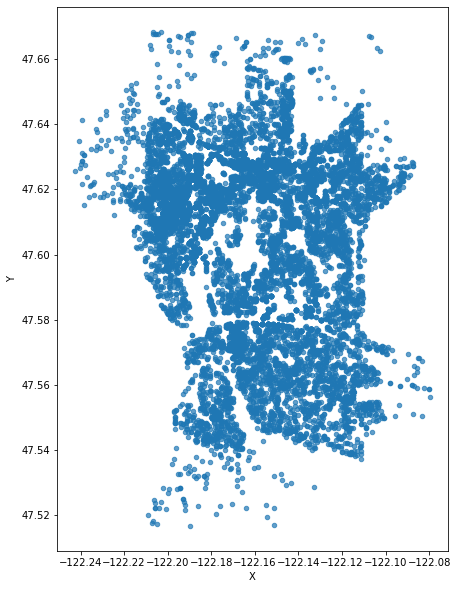

In [171]:
business.query('Year < 2020 and Year > 2010').plot(kind='scatter',x='X',y='Y',figsize=(7,10),alpha=0.7)

<AxesSubplot:xlabel='X', ylabel='Y'>

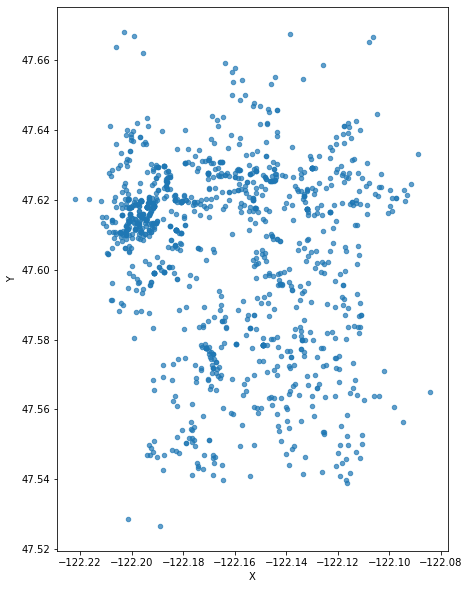

In [166]:
business.query('Year == 2020').plot(kind='scatter',x='X',y='Y',figsize=(7,10),alpha=0.7)

<AxesSubplot:xlabel='X', ylabel='Y'>

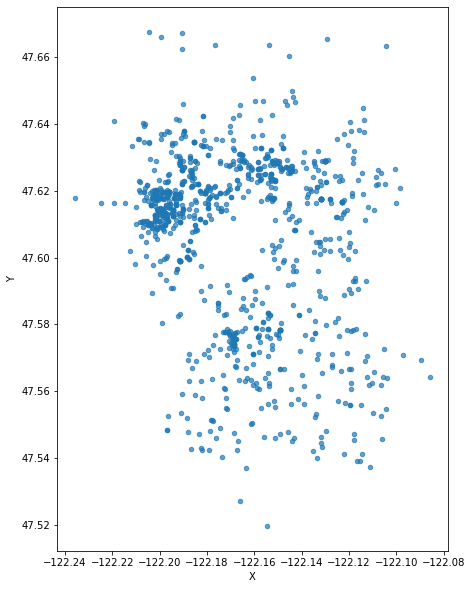

In [167]:
business.query('Year == 2019').plot(kind='scatter',x='X',y='Y',figsize=(7,10),alpha=0.7)

<AxesSubplot:xlabel='X', ylabel='Y'>

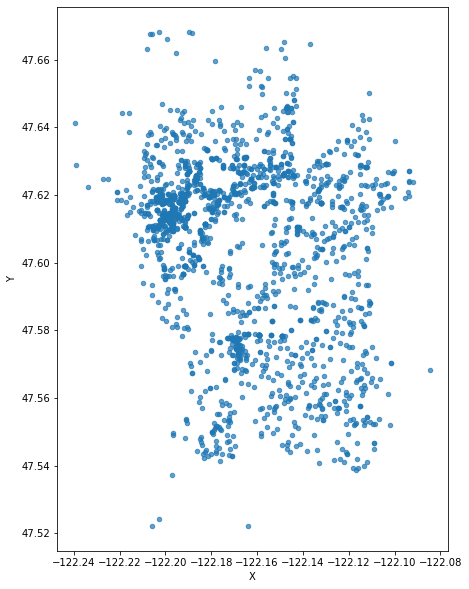

In [168]:
business.query('Year == 2018').plot(kind='scatter',x='X',y='Y',figsize=(7,10),alpha=0.7)